In [3]:
import numpy as np                        
from sklearn.decomposition import PCA     
from sklearn.manifold import TSNE         
from umap import UMAP               
import matplotlib.pyplot as plt           
from SERGIO.SERGIO.sergio import sergio   
from time import time

In [3]:
def ds3_clean_and_noisy_expressions():
    sim = sergio(number_genes=1200,
                 number_bins=9,
                 number_sc=300,
                 noise_params=1.,
                 decays=0.8,
                 sampling_state=10,
                 noise_type="dpd")
    sim.build_graph(
        input_file_taregts="SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Interaction_cID_6.txt",
        input_file_regs="SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Regs_cID_6.txt",
        shared_coop_state=2)
    sim.simulate()
    clean_expression = sim.getExpressions()
    expr_add_outlier_genes = sim.outlier_effect(clean_expression, outlier_prob=0.01, mean=0.8, scale=1)
    libFactor, expr_O_L = sim.lib_size_effect(expr_add_outlier_genes, mean=4.6, scale=0.4)
    binary_ind = sim.dropout_indicator(expr_O_L, shape=6.5, percentile=82)
    expr_O_L_D = np.multiply(binary_ind, expr_O_L)
    count_matrix_umi_count_format = sim.convert_to_UMIcounts(expr_O_L_D)
    noisy_expression = np.concatenate(count_matrix_umi_count_format, axis=1)
    return clean_expression, noisy_expression

In [4]:
start = time()
ds3_clean, ds3_noisy = ds3_clean_and_noisy_expressions()
print(f"took {time() -  start}")

Start simulating new level
There are 2 genes to simulate in this layer
Done with current level
Start simulating new level
There are 3 genes to simulate in this layer
Done with current level
Start simulating new level
There are 5 genes to simulate in this layer
Done with current level
Start simulating new level
There are 9 genes to simulate in this layer
Done with current level
Start simulating new level
There are 26 genes to simulate in this layer
Done with current level
Start simulating new level
There are 82 genes to simulate in this layer
Done with current level
Start simulating new level
There are 1073 genes to simulate in this layer
Done with current level
took 3213.4593675136566


In [7]:
3214/60, "minutes!"

(53.56666666666667, 'minutes!')

In [5]:
# save clean and noisy data for later use
np.save("ds3_clean.npy", ds3_clean)
np.save("ds3_noisy.npy", ds3_noisy)

In [4]:
# pca
pca = PCA(n_components = 10)  

In [5]:
# t-SNE
tsne = TSNE(n_components = 2)                                      

In [6]:
# UMAP
umap_algo = UMAP(n_components = 2)    

## <span style="color:blue">replicate clean DS3</span>

In [93]:
# check clean first
ds3_clean = np.load("ds3_clean.npy")
ds3_clean.shape

(9, 1200, 300)

In [ ]:
pca_coords_ds3_clean = pca.fit_transform(ds3_clean)

In [ ]:
# plot clean transform pca
labels = list(range(number_bins))
y = np.array([i for i in range(number_bins) for _ in range(number_sc)])
scatter = plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=y)
handles, _ = scatter.legend_elements(prop='colors')
plt.title("tSNE 3 cell types dynamics")
plt.legend(handles, labels)
plt.show()

/tmp/ipykernel_13713/3660432922.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  anno = [np.array([str(x)] * 300, dtype=np.object) for x in range(9)]


2700
(2700, 1200)


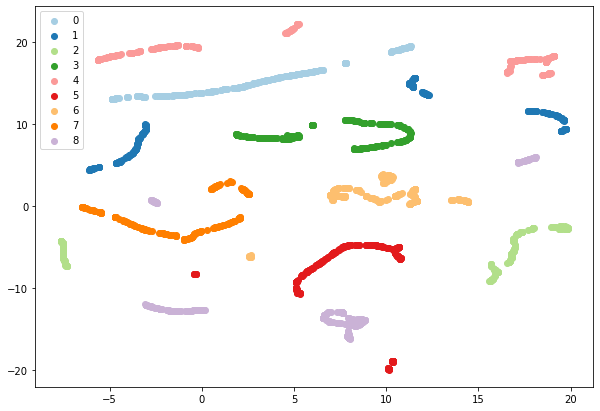

In [95]:
anno = [np.array([str(x)] * 300, dtype=np.object) for x in range(9)]
anno = np.concatenate(anno, axis = 0)
print(len(anno))
counts_true = np.concatenate(ds3_clean, axis = 1).T

print(counts_true.shape)
# counts_obs = counts_obs/(np.sum(counts_obs, axis = 1)[:, None] + 1e-6)* 100


counts_true = np.log1p(counts_true)

x_pca = pca.fit_transform(counts_true)
# x_tsne = tsne.fit_transform(x_pca)
x_umap = umap_algo.fit_transform(x_pca)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()
colormap = plt.get_cmap("Paired")
for i, clust in enumerate(np.sort(np.unique(anno))):
    idx = np.where(anno == clust)[0]
    ax.scatter(x_umap[idx, 0], x_umap[idx, 1], color = colormap(i), label = clust)
ax.legend()
plt.show()

## replicate ds3 noisy

In [98]:
sim = sergio(number_genes=1200,
                 number_bins=9,
                 number_sc=300,
                 noise_params=1.,
                 decays=0.8,
                 sampling_state=10,
                 noise_type="dpd")
sim.build_graph(
        input_file_taregts="SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Interaction_cID_6.txt",
        input_file_regs="SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Regs_cID_6.txt",
        shared_coop_state=2)
# sim.simulate()

sim.x = np.load("ds3_clean.npy")
# sim.x = np.array(pd.read_csv(theirs, delimiter=",", index_col=0)).reshape(9, 1200, 300)

clean_expression = sim.x
expr_add_outlier_genes = sim.outlier_effect(clean_expression, outlier_prob=0.01, mean=0.8, scale=1)
libFactor, expr_O_L = sim.lib_size_effect(expr_add_outlier_genes, mean=7, scale=0.4)
binary_ind = sim.dropout_indicator(expr_O_L, shape=8, percentile=80)
expr_O_L_D = np.multiply(binary_ind, expr_O_L)
count_matrix_umi_count_format = sim.convert_to_UMIcounts(expr_O_L_D)
noisy_expression = np.concatenate(count_matrix_umi_count_format, axis=1)

/tmp/ipykernel_13713/399719085.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  anno = [np.array([str(x)] * 300, dtype=np.object) for x in range(9)]


2700
(2700, 1200)


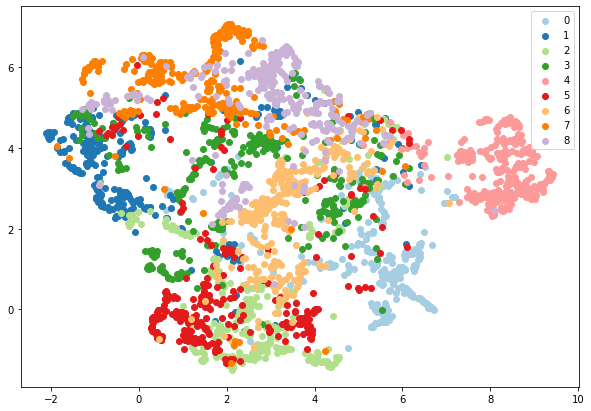

In [99]:
ds3_noisy = np.load("ds3_noisy.npy")

anno = [np.array([str(x)] * 300, dtype=np.object) for x in range(9)]
anno = np.concatenate(anno, axis = 0)
print(len(anno))

#counts_true = ds3_noisy.T
counts_true = noisy_expression.T
print(counts_true.shape)

counts_true = counts_true/(np.sum(counts_true, axis = 1)[:, None] + 1e-6)* 100
counts_true = np.log1p(counts_true)

x_pca = pca.fit_transform(counts_true)
# x_tsne = tsne.fit_transform(x_pca)
x_umap = umap_algo.fit_transform(x_pca)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()
colormap = plt.get_cmap("Paired")
for i, clust in enumerate(np.sort(np.unique(anno))):
    idx = np.where(anno == clust)[0]
    ax.scatter(x_umap[idx, 0], x_umap[idx, 1], color = colormap(i), label = clust)
ax.legend()
plt.show()

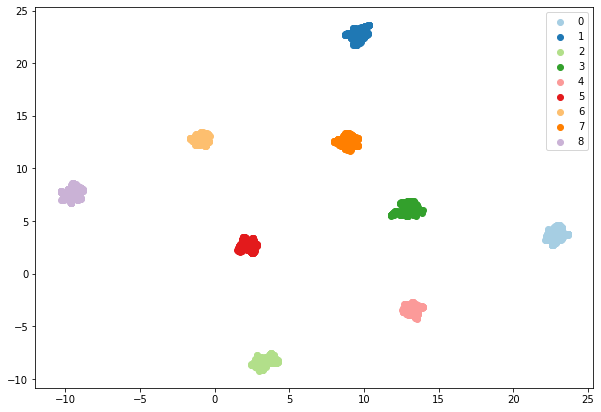

In [79]:
umap_op = UMAP(n_components = 2, min_dist = 0.1)
counts_obs = noisy_expression.T
counts_obs = counts_obs/(np.sum(counts_obs, axis = 1)[:, None] + 1e-6)* 100
counts_obs = np.log1p(counts_obs)
x_umap = umap_op.fit_transform(counts_obs)
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()
colormap = plt.get_cmap("Paired")
for i, clust in enumerate(np.sort(np.unique(anno))):
    idx = np.where(anno == clust)[0]
    ax.scatter(x_umap[idx, 0], x_umap[idx, 1], color = colormap(i), label = clust)
ax.legend()
plt.show()

In [36]:
import pandas as pd
theirs = "SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/simulated_noNoise_0.csv"
df = pd.read_csv(theirs, delimiter=",", index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699
0,0.859688,1.215982,1.358645,0.000000,1.656631,0.190782,2.270504,1.507896,0.000000,2.170924,...,1.629289,1.014031,0.999165,2.311475,0.022782,1.217002,0.674387,0.098769,1.327759,0.703059
1,2.775117,1.251993,1.462926,3.579853,0.000000,0.333787,1.786067,1.498380,5.920356,1.848761,...,4.934821,4.265108,1.649650,3.621482,5.417653,0.220453,4.086647,2.598551,0.227499,1.479762
2,9.605561,0.157812,1.042936,2.829591,5.073658,4.189023,4.187311,4.839548,1.878134,2.652484,...,0.748696,0.665768,5.800813,1.770779,3.323194,3.495395,2.621015,1.873548,2.646383,2.380960
3,8.434371,0.597816,0.632151,6.695461,1.784263,4.987073,4.593444,3.802726,1.400624,4.542381,...,2.602369,1.626507,2.029661,0.061925,3.218704,0.074476,2.252107,1.722882,0.313904,0.562658
4,0.953639,2.334881,1.110712,0.000000,0.821860,0.278403,1.526654,0.777488,0.000000,1.397422,...,2.203663,4.313385,2.868850,2.486721,2.371302,2.385052,3.641036,5.686660,4.357524,2.397899


(1200, 2700)
2700
(2700, 1200)


/tmp/ipykernel_13713/1702935533.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  anno = [np.array([str(x)] * 300, dtype=np.object) for x in range(9)]


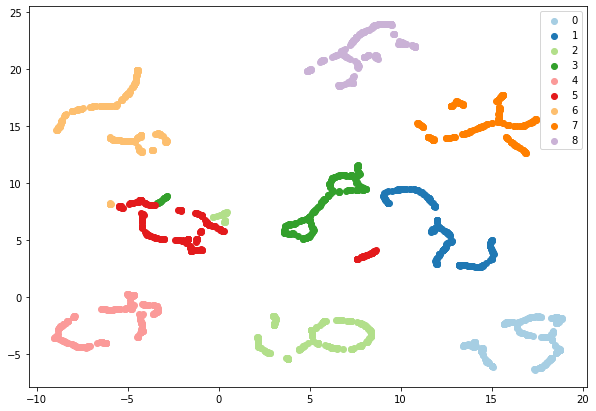

In [38]:
print(df.shape)

anno = [np.array([str(x)] * 300, dtype=np.object) for x in range(9)]
anno = np.concatenate(anno, axis = 0)
print(len(anno))
counts_true = df.T

print(counts_true.shape)
# counts_obs = counts_obs/(np.sum(counts_obs, axis = 1)[:, None] + 1e-6)* 100


# counts_true = np.log1p(counts_true)

x_pca = pca.fit_transform(counts_true)
# x_tsne = tsne.fit_transform(x_pca)
x_umap = umap_algo.fit_transform(x_pca)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()
colormap = plt.get_cmap("Paired")
for i, clust in enumerate(np.sort(np.unique(anno))):
    idx = np.where(anno == clust)[0]
    ax.scatter(x_umap[idx, 0], x_umap[idx, 1], color = colormap(i), label = clust)
ax.legend()
plt.show()

In [49]:
np.load("ds3_clean.npy").shape

(9, 1200, 300)

In [68]:
np.array(pd.read_csv(theirs, delimiter=",", index_col=0)).reshape(9, 1200, 300).shape

(9, 1200, 300)

In [53]:
np.load(theirs, allow_pickle=True)

OSError: Failed to interpret file 'SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/simulated_noNoise_0.csv' as a pickle